<a href="https://colab.research.google.com/github/jana-nf/-7DaysOfCode-ml-Alura-Jana-nf/blob/main/_7DaysOfCodeDivisaoTreinoTesteValidacaoMLAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DIA 3/7

Machine Learning


Alura



No desafio de hoje, você vai trabalhar na divisão dos seus dados em treino, validação e teste. Essa é uma etapa essencial antes de criar os seus modelos de machine learning.


Mas você deve estar se perguntando, por que eu vou precisar dividir, não é mesmo?! A resposta é simples: para avaliar o desempenho do seu modelo de forma justa. Se você usar todos os dados para treinar o modelo, não terá como saber se ele é bom o suficiente para generalizar para dados novos. Além disso, essa técnica é usada para garantir que o modelo não esteja superajustado (overfitting) aos dados de treinamento e que possa funcionar bem em novos dados.


Em resumo, os dados de treinamento são usados para treinar o modelo, enquanto que os dados de teste são usados para avaliar o desempenho do modelo em dados que ele nunca viu antes. E os dados de validação, são usados para ajustar os hiperparâmetros do modelo (parâmetros que melhoram o desempenho do modelo).


Mas como você pode dividir os dados? Bom, existem várias formas de fazer isso.


Uma delas é a divisão aleatória, que simplesmente separa os dados em três conjuntos de forma aleatória. Geralmente, 70-80% dos dados são usados para treino, 10-20% para teste e 10-20% para validação. Essa técnica é simples e rápida, mas pode não ser uma boa escolha quando há desequilíbrio de dados.


Outra forma é a validação cruzada, que é usada para avaliar a capacidade de generalização do modelo em diferentes conjuntos de dados. Ela ajuda muito a evitar o overfitting, que é quando um modelo se ajusta demais aos dados de treinamento, mas não generaliza bem para novos dados.


Uma forma comum de validação cruzada é a StratifiedKFold, que é especialmente útil para conjuntos de dados desbalanceados (e aqui já vai um spoiler do desafio do dia 6 👀).


Além disso, após a divisão dos dados, é necessário dividir o conjunto em X e Y. No seu caso, você terá o conjunto de variáveis explicativas (X), como gênero musical, duração da música, instrumentação, etc, e a variável de saída (Y), que indicará a popularidade da música, e que você quer prever.


Então, minha proposta pra hoje é que você realize a divisão dos dados utilizando a validação cruzada. E como desafio extra, utilize a StratifiedKFold e compare com outras técnicas de divisão de dados.


Lembre-se que a divisão de dados é uma etapa muito importante no processo de machine learning e pode afetar significativamente os resultados do seu modelo.

DICA


Com dúvidas sobre a validação cruzada? Veja esse artigo de introdução e esse artigo de validação de modelos da Alura.

Você pode começar separando seu dataframe em df_train e df_test aplicando o método train_test_split() da biblioteca Sklearn.

Em seguida, a partir do dataframe de treino (df_train), utilize a validação cruzada para separação dos dados em treino e validação. Tente utilizar a classe StratifiedKFold e aplicar um looping para separar os dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

##Importando o conjunto de dados

Observação: A coluna "Unnamed: 0" é criada pelo pandas quando nenhum cabeçalho é fornecido ou quando há uma coluna adicional de índice de linha sem nome no arquivo CSV. Para evitar que a coluna "Unnamed: 0" apareça ao ler um arquivo CSV com o pandas, você pode especificar qual coluna é o índice do DataFrame usando o parâmetro index_col da função read_csv()

In [2]:
dados_musicas = pd.read_csv('https://raw.githubusercontent.com/letpires/7DaysOfCodeSpotifyML/main/dataset.csv', index_col=0)
dados_musicas.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
#Verificando quantidade de linhas, colunas e tipos
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [4]:
# Extraindo a descrição dos atributos numéricos
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


##Análise Exploratória dos Dados

A análise exploratória de dados é uma abordagem para analisar conjuntos de dados e resumir suas características principais, geralmente com métodos visuais.

##Descrição dos dados
Vamos ver como os dados estão dispostos, checando suas dimensões e se há dados faltantes.

In [5]:
# visualizando suas dimensões
dados_musicas.shape

(114000, 20)

In [6]:
# visualizando a quantidade em cada linha e seu formato
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

Podemos observar que existem features númericas e categóricas.

#Análises estatísticas
Vamos dar uma olhada inicial nas principais estatísticas descritivas. Uma análise descritiva é um primeiro passo importante para a realização de análises estatísticas, pois nos dá uma idéia da distribuição dos nossos dados e ajuda-nos a detectar outliers.

In [7]:
# visualizando as estatísticas
dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


O dataset possui 113.550 entradas.

In [8]:
# Artistas únicos e contagem de músicas por artista
print(dados_musicas['artists'].unique().shape)
print(dados_musicas['artists'].value_counts())

(31438,)
artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64


#Verificando valores ausentes

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dados_musicas.isnull().sum() / dados_musicas.shape[0]).sort_values(ascending=False)

,0
album_name,0.000009
track_name,0.000009
artists,0.000009
track_id,0.000000
speechiness,0.000000
time_signature,0.000000
tempo,0.000000
valence,0.000000
liveness,0.000000
instrumentalness,0.000000


In [10]:
dados_musicas.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [11]:
#função que gera uma gráfico de barras com colunas e frequência dos dados faltantes.
def missing_visualization(df):
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"colunas":[],"quant_isnull":[]}
  for coluna,quant in zip(columns,quant_isnull):
    if quant > 0:
      dic["colunas"].append(quant)
      dic["quant_isnull"].append(coluna)
  df = pd.DataFrame(dic)
  plt.figure(figsize=(15,5))
  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")
  plt.xticks(rotation=45);

<ipython-input-11-4a2b87ad6088>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["quant_isnull"],y=df["colunas"],data=df, palette="rocket")


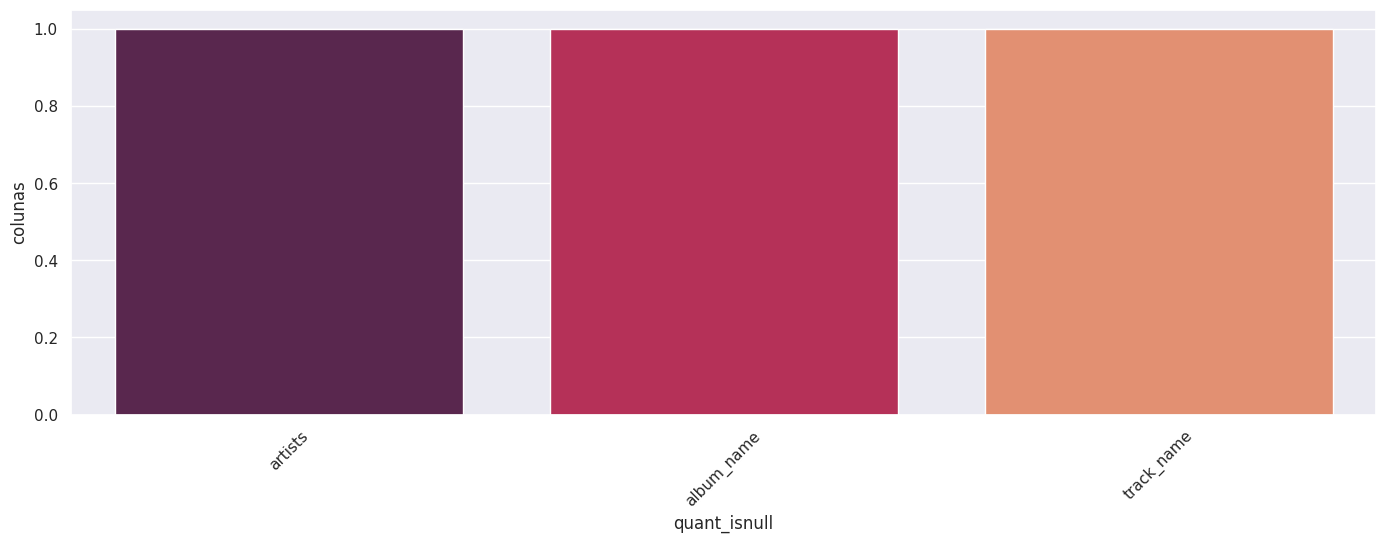

In [12]:
missing_visualization(dados_musicas)

Podemos observar que temos valores ausentes no nosso dataset. Mais a frente precisaremos tratá-los.

##Respondendo algumas perguntas sobre nossos dados

In [13]:
#As 100 músicas mais populares versus todo o conjunto de dados

sorted_df = dados_musicas.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


In [14]:
dados_musicas.isna().sum() #check for null values

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [15]:
dados_musicas.isna().sum() #check for null values

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [16]:
dados_musicas.shape

(114000, 20)

In [17]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [18]:
dados_musicas.duration_ms

,duration_ms
0,230666
1,149610
2,210826
3,201933
4,198853
...,...
113995,384999
113996,385000
113997,271466
113998,283893


In [19]:
#Top 5 artistas populares

popular_artists = dados_musicas.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

,popularity
artists,
The Beatles,279
George Jones,271
Stevie Wonder,236
Linkin Park,224
Ella Fitzgerald,222


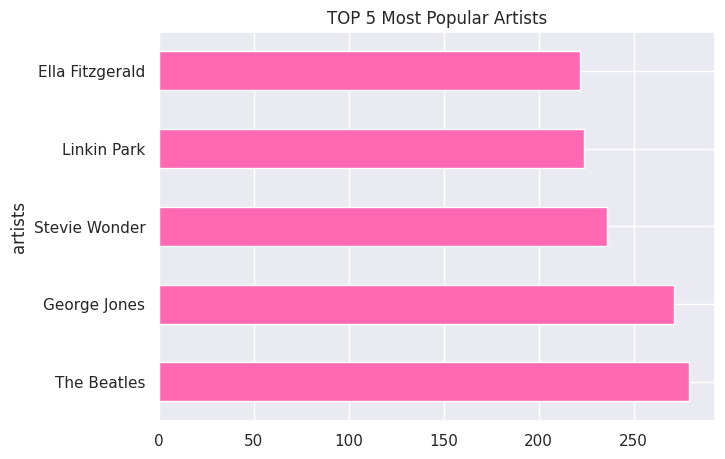

In [20]:
popular_artists.plot.barh(color="hotpink") ##visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

In [21]:
#top 5 longest songs or tracks

long_songs = dados_musicas[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897


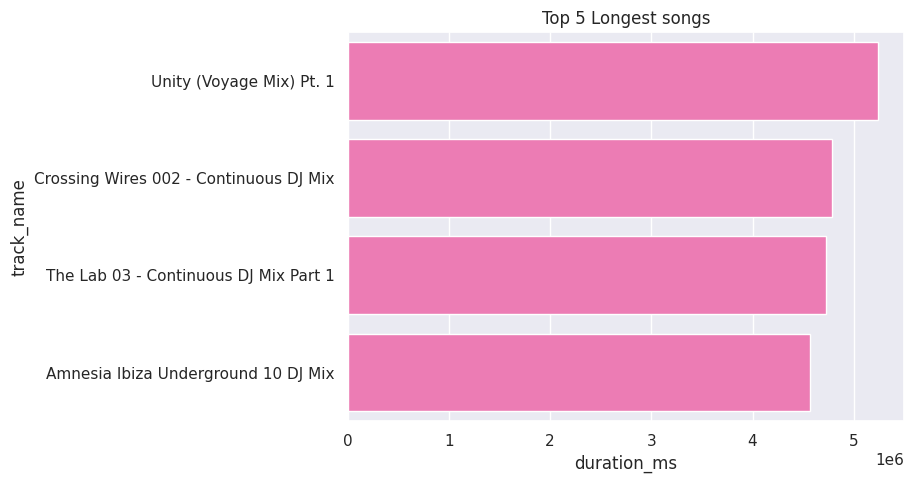

In [22]:
sns.barplot(x="duration_ms", y="track_name", data= long_songs, color = 'hotpink')
plt.title("Top 5 Longest songs")
plt.show()

In [23]:
#Top 5 most trending genre

trend_genre = dados_musicas[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


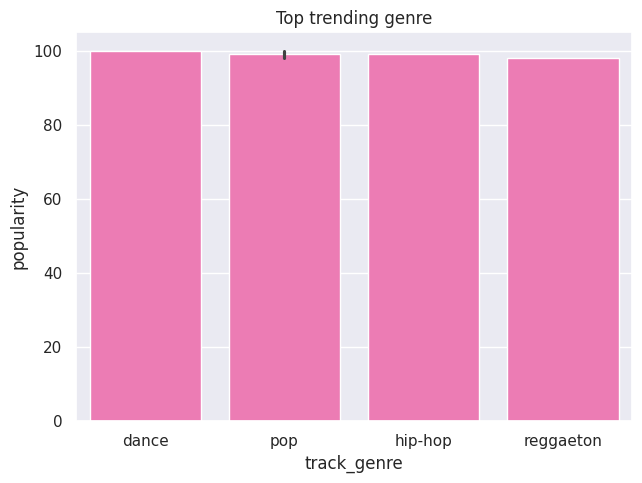

In [24]:
sns.barplot(x="track_genre",y="popularity", data=trend_genre, color = 'hotpink')
plt.title("Top trending genre")
plt.show()

In [25]:
#Top 5 most danceable songs

danceable = dados_musicas[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


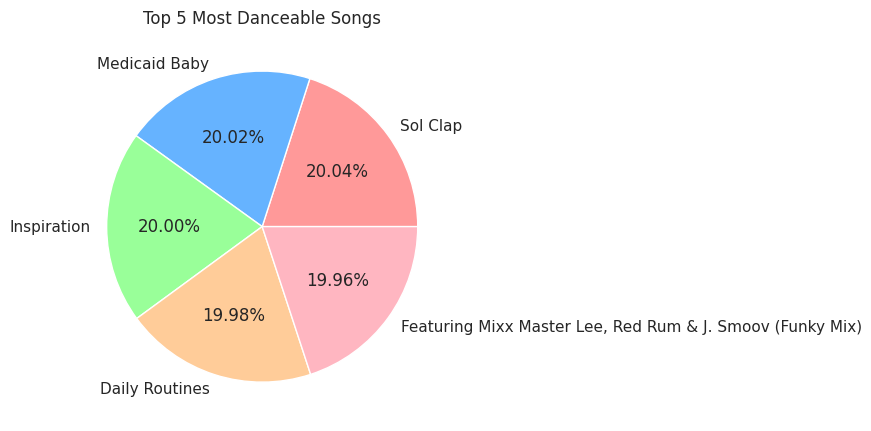

In [26]:
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb6c1']

plt.pie(x="danceability", data=danceable, autopct='%1.2f%%', labels=danceable.track_name, colors = colors)
plt.title("Top 5 Most Danceable Songs")
plt.show()

In [27]:
#Encontrando correlação entre as variáveis

dados_musicas.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [29]:
#corr_table = dados_musicas.corr(method="pearson") #get variables the correlation

# Selecionando apenas as colunas numéricas para o cálculo da correlação
numeric_columns = dados_musicas.select_dtypes(include=np.number).columns
corr_table = dados_musicas[numeric_columns].corr(method="pearson")

# Exibindo a tabela de correlação
print(corr_table)

                  popularity  duration_ms  danceability    energy       key  \
popularity          1.000000    -0.007101      0.035448  0.001056 -0.003853   
duration_ms        -0.007101     1.000000     -0.073426  0.058523  0.008114   
danceability        0.035448    -0.073426      1.000000  0.134325  0.036469   
energy              0.001056     0.058523      0.134325  1.000000  0.048006   
key                -0.003853     0.008114      0.036469  0.048006  1.000000   
loudness            0.050423    -0.003470      0.259077  0.761690  0.038590   
mode               -0.013931    -0.035556     -0.069219 -0.078362 -0.135916   
speechiness        -0.044927    -0.062600      0.108626  0.142509  0.020418   
acousticness       -0.025472    -0.103788     -0.171533 -0.733906 -0.040937   
instrumentalness   -0.095139     0.124371     -0.185606 -0.181879 -0.006823   
liveness           -0.005387     0.010321     -0.131617  0.184796 -0.001600   
valence            -0.040534    -0.154479      0.477

Verificar a correlação de dados na análise exploratória é importante porque ajuda a entender a relação entre as variáveis em um conjunto de dados. A correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis.

Ao examinar a correlação, podemos determinar se as variáveis estão positivamente correlacionadas (ou seja, quando uma aumenta, a outra também aumenta), negativamente correlacionadas (quando uma aumenta, a outra diminui) ou não correlacionadas (quando não há relação aparente entre as variáveis).

Além disso, a correlação também ajuda a identificar possíveis problemas com o conjunto de dados, como a presença de outliers ou variáveis altamente correlacionadas, o que pode afetar a precisão dos modelos de análise de dados.

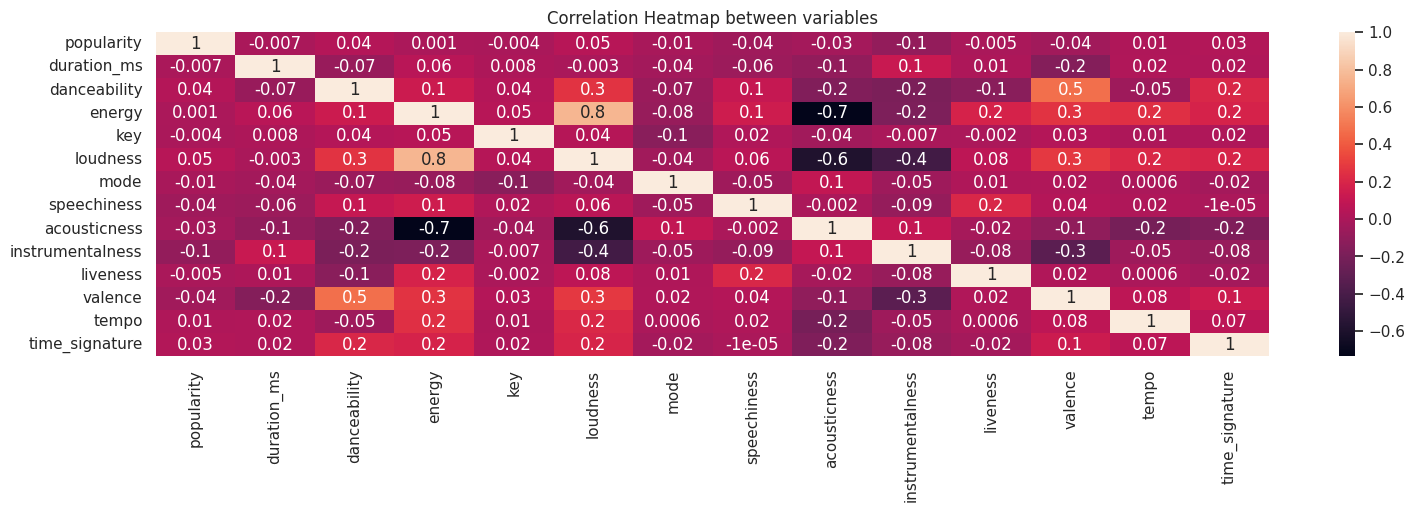

In [30]:
###plotting the correlation table using seaborn
plt.figure(figsize=(16,4))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show() #display the plot

Podemos ver que a feature loudness e energia possuem uma alta correlação. Ou seja, quando uma aumenta, a outra também aumenta.

##Pré-Processamento dos Dados
Esse é o momento em que começamos a preparar nosso conjunto de dados para nosso modelo de machine learning!

In [31]:
#Removendo itens duplicados

dados_musicas = dados_musicas.drop_duplicates()
dados_musicas.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [32]:
# Criando classes de popularidade
dados_musicas[dados_musicas["popularity"] >=80]

conditionlist = [
    (dados_musicas['popularity'] >= 80) ,
    (dados_musicas['popularity'] <80)]

choicelist = [1,0]
dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)

<ipython-input-32-942e9f9a51d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_musicas['pop_classe'] = np.select(conditionlist, choicelist, default='Not Specified')
<ipython-input-32-942e9f9a51d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_musicas['pop_classe'] = dados_musicas['pop_classe'].astype(int)


In [33]:
dados_musicas = dados_musicas.dropna() #removendo valores nulos

In [34]:
dados_musicas.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'pop_classe'],
      dtype='object')

In [35]:
dados_musicas = dados_musicas.drop(columns=['popularity'])

In [36]:
dados_musicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   duration_ms       113549 non-null  int64  
 5   explicit          113549 non-null  bool   
 6   danceability      113549 non-null  float64
 7   energy            113549 non-null  float64
 8   key               113549 non-null  int64  
 9   loudness          113549 non-null  float64
 10  mode              113549 non-null  int64  
 11  speechiness       113549 non-null  float64
 12  acousticness      113549 non-null  float64
 13  instrumentalness  113549 non-null  float64
 14  liveness          113549 non-null  float64
 15  valence           113549 non-null  float64
 16  tempo             113549 

In [37]:
#Mantendo somente colunas quantitativas e que são importantes para o modelo

df_quantitative = dados_musicas
cols_to_drop = []
for column in dados_musicas:
    if dados_musicas[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = dados_musicas.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")

Tamanho do dataset que vamos trabalhar: (113549, 15)


In [38]:
df_quantitative.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [39]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       113549 non-null  int64  
 1   danceability      113549 non-null  float64
 2   energy            113549 non-null  float64
 3   key               113549 non-null  int64  
 4   loudness          113549 non-null  float64
 5   mode              113549 non-null  int64  
 6   speechiness       113549 non-null  float64
 7   acousticness      113549 non-null  float64
 8   instrumentalness  113549 non-null  float64
 9   liveness          113549 non-null  float64
 10  valence           113549 non-null  float64
 11  tempo             113549 non-null  float64
 12  time_signature    113549 non-null  int64  
 13  pop_classe        113549 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


In [40]:
df_quantitative.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


In [41]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())

In [42]:
df_quantitative_nm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_classe
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


##Dividindo o dataset (treino, validação e teste)

Para divisão do dataset, separou-se em treino e teste, sendo que o teste será dividido com 20% de todo o conjunto e será usado somente após o modelo ser escolhido e ajustado.

Já os dados de treino, serão separados em treino e validação. Sendo os dados de validação usados para comparação de diferentes modelos e hiperparâmetros.

Embora os modelos sejam testados e otimizados, é díficil prever se perfomará bem em produção, por isso, o acompanhamento inicial é importante para verificar se realmente funciona ou precisa de ajustes.

Dados de treinamento: usado para treinar o modelo.

Dados de validação: usado para comparação de diferentes modelos e hiperparâmetros.

Dados de teste: usado para comprovar que aquele modelo realmente funciona. São dados ignorados no treinamento e no processo de escolha de hiperparâmetros.

In [43]:
# Separando os dados para treino e teste
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

In [44]:
# visualizando as proporções da variável alvo
df_train.pop_classe.value_counts(normalize=True)

,proportion
pop_classe,
0.0,0.98941
1.0,0.01059


In [45]:
# visualizando as proporções da variável alvo
df_test.pop_classe.value_counts(normalize=True)

,proportion
pop_classe,
0.0,0.989564
1.0,0.010436


In [46]:
# dividindo X e y
X = df_train.drop('pop_classe', axis=1)
y = df_train.pop_classe

# separando os dados mantendo a porcentagem de amostras em cada classe
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
# looping para separar os dados em treino e validação
for train_index, val_index in StratifKfold.split(X, y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [48]:
# checando as proporções da classe 1 na divisão
print(f'Dimensões: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proporção do df_train para classe=1: {round(len(df_train[df_train.pop_classe==1]) / df_train.shape[0], 4)}\n")
print(f"Proporção de X_train para classe=1:  {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proporção de X_val para classe=1:    {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensões: ((72672, 13), (18167, 13), (72672,), (18167,))

Proporção do df_train para classe=1: 0.0106

Proporção de X_train para classe=1:  0.0106
Proporção de X_val para classe=1:    0.0106


Dimensões: ((72672, 13), (18167, 13), (72672,), (18167,))

Proporção do df_train para classe=1: 0.0106

Proporção de X_train para classe=1:  0.0106
Proporção de X_val para classe=1:    0.0106
Os dois conjuntos estão com a mesma proporção na variável resposta. A partir de agora vamos trabalhar somente com o conjunto de dados de treino e o teste somente para validação final.

Então vamos separar o conjunto de dados de treino, em treino e validação.